<a href="https://colab.research.google.com/github/RoshanAswal/Car_evaluation/blob/main/CarSafety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q sklearn
!pip install category-encoders
%tensorflow_version 2.x

     |████████████████████████████████| 82 kB 365 kB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from google.colab import files
uploaded=files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [13]:
import io
df=pd.read_csv(io.BytesIO(uploaded['car_evaluation.csv']))

In [14]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [15]:
df.columns=['Bprice','Mprice','doors','persons','lug_boots','safety','accuracy']

In [16]:
df.head()

,Bprice,Mprice,doors,persons,lug_boots,safety,accuracy
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
# df.drop(['accuracy'],axis=1)

In [ ]:
# import category_encoders as ce
# encoder=ce.OrdinalEncoder(col=)

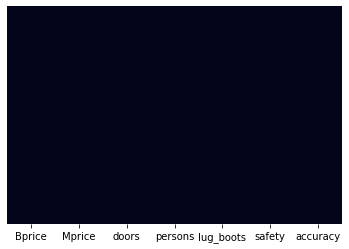

In [17]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [18]:
y=df.pop('accuracy')

In [19]:
df.shape

(1727, 6)

Text(0, 0.5, 'Price Distribution')

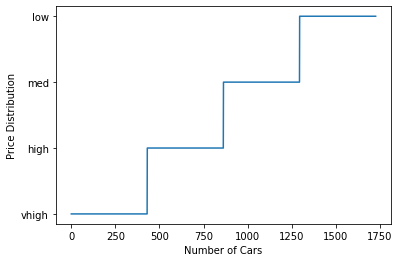

In [20]:
plt.plot(df['Bprice'])
plt.xlabel('Number of Cars')
plt.ylabel('Price Distribution')

In [21]:
# Splitting data
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=42)
print("train data - ",x_train.shape)
print("test data - ",x_test.shape)

train data -  (1381, 6)
test data -  (346, 6)


In [23]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Bprice','Mprice','doors','persons','lug_boots','safety'])
x_train=encoder.fit_transform(x_train)
x_test=encoder.fit_transform(x_test)

In [24]:
x_train.head()

,Bprice,Mprice,doors,persons,lug_boots,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [25]:
#Training model
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
score=model.score(x_test,y_test)
print(score)

0.9595375722543352


In [29]:
# Using K-Neighbors Classifier
model2=KNeighborsClassifier(n_neighbors=7)
model2.fit(x_train,y_train)
score=model2.score(x_test,y_test)
print(score)

0.9132947976878613


In [26]:
y_pred=model.predict(x_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.91      0.96      0.94        77
        good       0.90      0.60      0.72        15
       unacc       1.00      1.00      1.00       237
       vgood       0.72      0.76      0.74        17

    accuracy                           0.96       346
   macro avg       0.88      0.83      0.85       346
weighted avg       0.96      0.96      0.96       346

[[ 74   1   1   1]
 [  2   9   0   4]
 [  1   0 236   0]
 [  4   0   0  13]]


In [28]:
res=model.predict(x_test)
data=list(y_test)
for i in range(len(res)):
  print("pred - ",res[i],"   real - ",data[i])

pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  acc    real -  acc
pred -  unacc    real -  unacc
pred -  acc    real -  acc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  acc    real -  vgood
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  acc    real -  acc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  acc    real -  acc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  acc    real -  acc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pred -  acc    real -  acc
pred -  unacc    real -  unacc
pred -  unacc    real -  unacc
pre